Mask R-CNN Implementation

Adapted from https://github.com/matterport/Mask_RCNN/blob/master/samples/demo.ipynb
Written: Mark Bugeja,


1-Clone reposotory git clone https://github.com/matterport/Mask_RCNN.git


https://github.com/matterport/Mask_RCNN/issues/526; 
https://github.com/matterport/Mask_RCNN/issues/1797
Issues Solved!

In [1]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [2]:
Install Dependencies

SyntaxError: invalid syntax (<ipython-input-2-b8bced6a4199>, line 1)

In [6]:
#!pip install imgaug
#!pip install Cython
!pip install pycocotools
#!pip install kaggle
!pip install mrcnn
!pip install Pillow==5.3.0
#!pip install scikit-image
#!pip install tensorflow==1.14.0
!{sys.executable} -m pip install https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.9.0-py3-none-any.whl
# !pip install tensorflow==1.9.0
!pip install keras==2.2.0
#!pip install pycocotools
print("Installed packages")



  Using cached pycocotools-2.0.0.tar.gz (1.5 MB)
    ERROR: Command errored out with exit status 1:
     command: /Users/bombburster/anaconda3/envs/CV/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bm/302p8kdd2s3_smsc56bq872w0000gn/T/pip-install-1asqwuvx/pycocotools/setup.py'"'"'; __file__='"'"'/private/var/folders/bm/302p8kdd2s3_smsc56bq872w0000gn/T/pip-install-1asqwuvx/pycocotools/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/bm/302p8kdd2s3_smsc56bq872w0000gn/T/pip-install-1asqwuvx/pycocotools/pip-egg-info
         cwd: /private/var/folders/bm/302p8kdd2s3_smsc56bq872w0000gn/T/pip-install-1asqwuvx/pycocotools/
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/bm/302p8kdd2s3_smsc56bq

3-Test Installed Dependencies


In [7]:
import numpy
import scipy
import PIL
import tensorflow
import skimage
import h5py
import IPython
import cv2
import keras
import scipy
import matplotlib
import cython

print("All dependencies are installed")

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import os
os.chdir('C:/Users/Mark/Documents/Mask_RCNN-master/samples')

In [9]:
#import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from mrcnn.config import Config

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

# Root directory of the project
ROOT_DIR = "C:/Users/Mark/Documents/Mask_RCNN-master"


import warnings
warnings.filterwarnings("ignore")

 #Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
 #Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco



%matplotlib inline

In [10]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights fil
COCO_MODEL_PATH =  "C:/Users/Mark/Documents/Mask_RCNN-master/mask_rcnn_coco.h5"

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [11]:
class InferenceConfig(coco.CocoConfig):
  #class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [12]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
# Load weights trained on MS-COCO


In [13]:
from keras.engine import saving
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [14]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


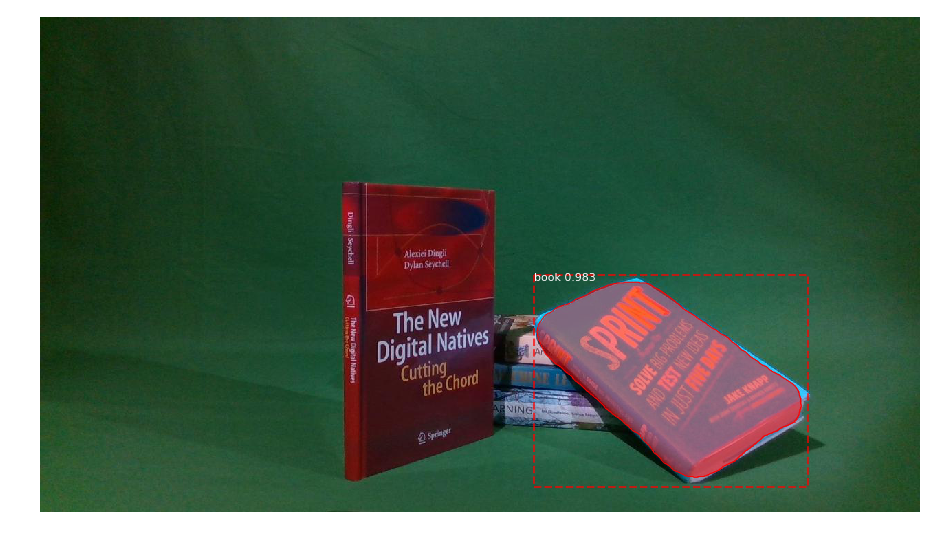

In [22]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In the next code snipped we will take all the masks predicted by our model and store them in the mask variable. 

What can you see?

In [18]:
r['masks']

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

The original masks saved by the model as structured in boolean form (True and False) and hence we need to convert them to numbers (1 and 0).

NB: the shape of the file is split into 3 variables. The first two denote the height and width of the image. The final variable is the amount of objects (or segments) the model has found. 

In [24]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(720, 1280, 1)

In order to extract the masks from the original image. We first have to count the number of detected objects (Found by querying the 3rd variable of the mask value). The iterate through the image and saving the pixels where the value is set to 1 (denoting detected object)

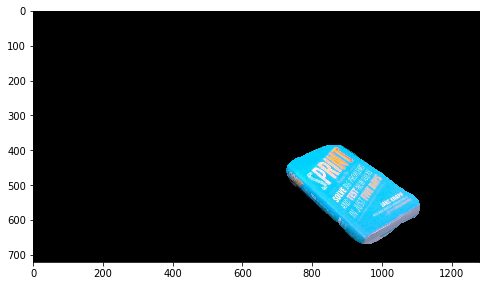

In [32]:
for i in range(mask.shape[2]):
    temp = skimage.io.imread("C:/Users/Mark/Documents/Mask_RCNN-master/images/3_colour (1).jpeg")
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)